# RedHat BitbyBit StackOverFlow Tag Network Visualization and Analysis: 

* Making the network
* Network Visualization


# Make Network

In [7]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
nodes = pd.read_csv('../input/stack_network_nodes.csv')
edges = pd.read_csv('../input/stack_network_links.csv')

In [9]:
nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [10]:
edges.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


A graph consists of nodes and edges.  In this case the nodes are the tags that appear in a developer's profile in stackoverflow ["Developer Stories"](https://stackoverflow.com/users/story/join). If two tags appear on the same profile there's a tag between them.  To build a graph in networkx first we define an empty graph. Then we add the nodes and the edges to the graph from the dataframes ```nodes``` and ```edges``` by iterating over the rows. 

> The dataset include only a subset of tags used on Developer Stories, tags that were used by at least 0.5% of users and were correlated with another tag with a correlation coefficient above 0.1. This means that very sparsely used tags and tags that are not used with other tags were filtered out. 

For more details see here : https://www.kaggle.com/stackoverflow/stack-overflow-tag-network/discussion/41307

Nodes and edges can have metadata associated with them. 

**Node metadata : **
*  ```nodesize```  :  Proportional to how many developers have that tag in their developer story profile.
*  ```group``` : which group that node belongs to (calculated via a cluster walktrap).

**Edge metadata : **
*  ```value``` :  proportional to how correlated those two tags are (correlation coefficient * 100). 



In [11]:
G = nx.Graph()

In [12]:
for index, row in nodes.iterrows():
    G.add_node(row["name"],group = row["group"], nodesize = row["nodesize"] )

In [15]:
for index, row in edges.iterrows():
    G.add_edge(row["source"], row["target"], weight = row["value"])

In [16]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 245
Average degree:   4.2609


# Connectivity 


In [17]:
nx.is_connected(G)

False

In [18]:
nx.number_connected_components(G)

6

In [19]:
maximum_connected_component = max(nx.connected_component_subgraphs(G), key=len)

# Network Visualization

Reference : https://www.kaggle.com/jncharon/python-network-graph for the network visualization 

In [20]:
print(nx.__version__)

2.3


In [21]:
def draw_graph(G,size):
    nodes = G.nodes()
    color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}
    node_color= [color_map[d['group']] for n,d in G.nodes(data=True)]
    node_size = [d['nodesize']*10 for n,d in G.nodes(data=True)]
    pos = nx.drawing.spring_layout(G,k=0.70,iterations=60)
    plt.figure(figsize=size)
    nx.draw_networkx(G,pos=pos,node_color=node_color,node_size=node_size,edge_color='#FFDEA2',edge_width=1)
    plt.show()

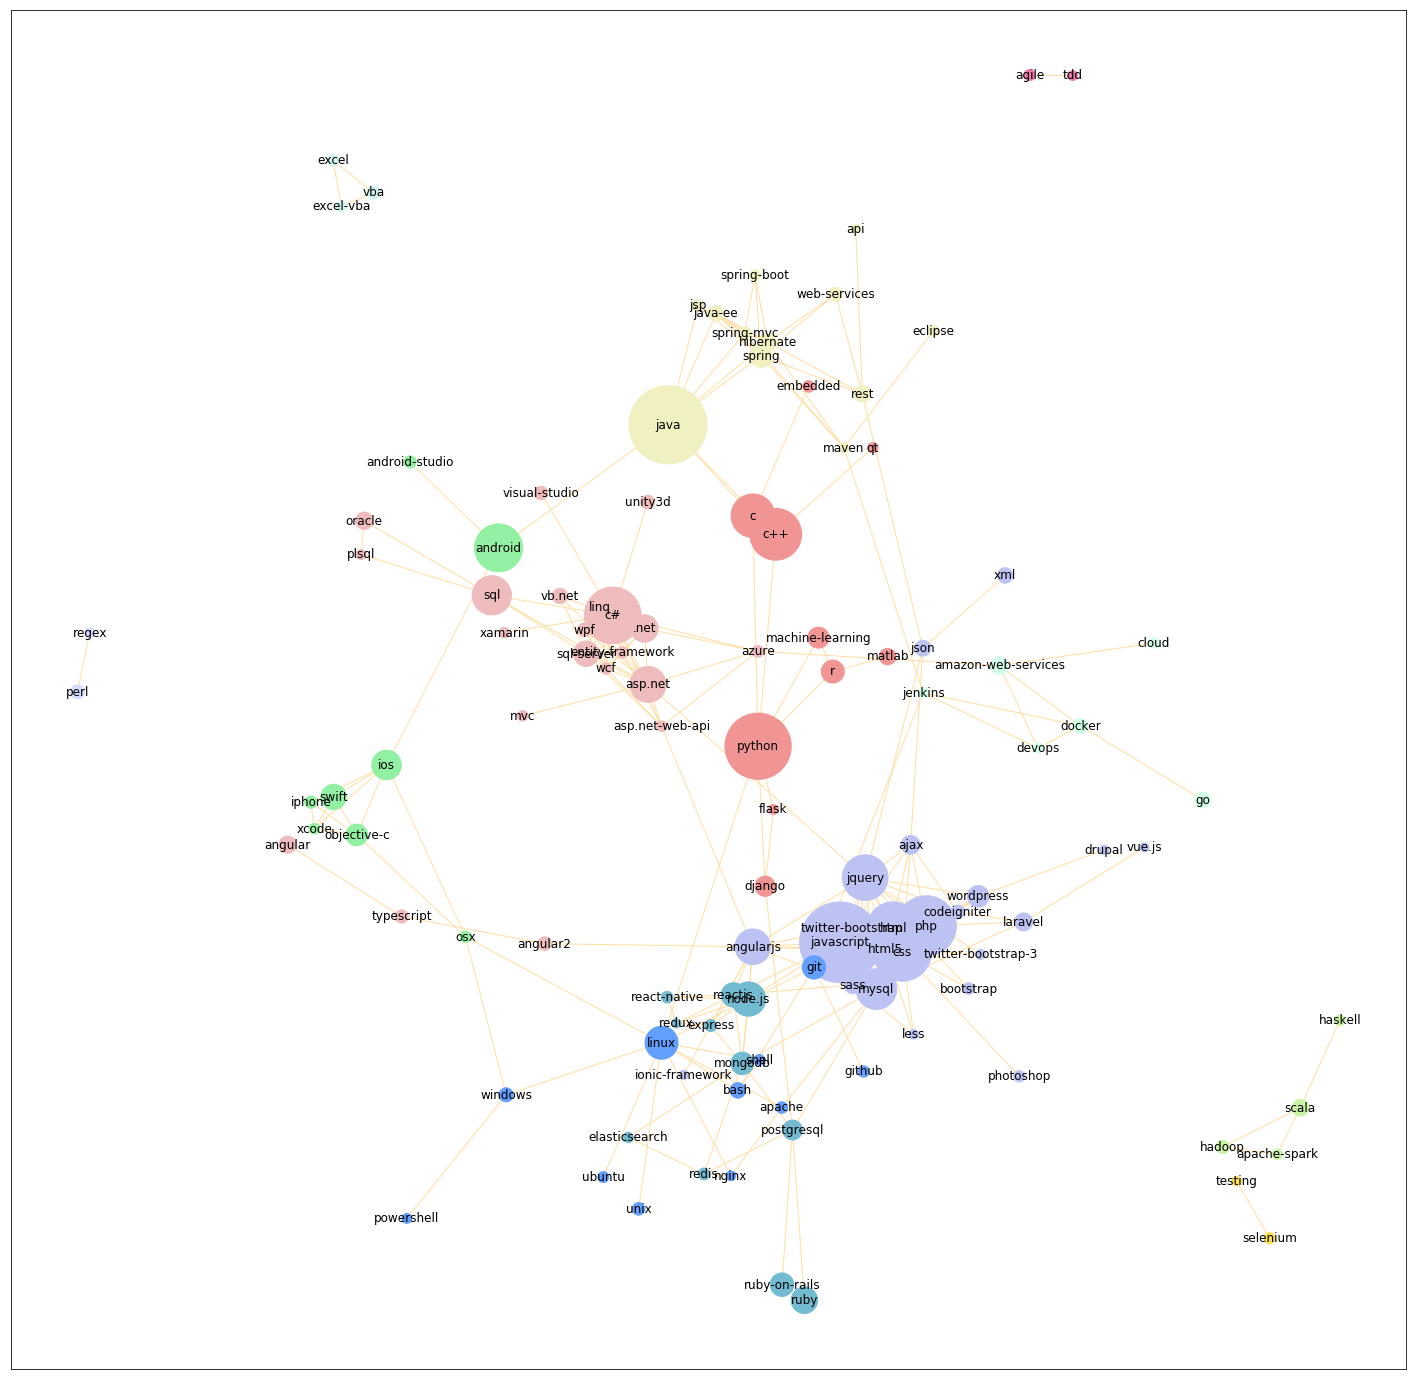

In [22]:
draw_graph(G,size=(25,25))

# Cliques 

In [23]:
cliques = list(nx.find_cliques(G))

In [24]:
clique_number = len(list(cliques))
print(clique_number)

89


In [25]:
for clique in cliques:
    print(clique)

['xml', 'json']
['scala', 'haskell']
['scala', 'hadoop', 'apache-spark']
['ubuntu', 'linux']
['postgresql', 'ruby', 'ruby-on-rails']
['postgresql', 'mongodb', 'redis']
['postgresql', 'mongodb', 'mysql']
['postgresql', 'django']
['laravel', 'php', 'codeigniter', 'mysql']
['laravel', 'vue.js']
['embedded', 'c']
['angular2', 'angularjs']
['angular2', 'typescript']
['iphone', 'objective-c', 'xcode', 'ios', 'swift']
['api', 'rest']
['plsql', 'oracle', 'sql']
['flask', 'python', 'django']
['.net', 'c#', 'asp.net', 'entity-framework', 'wcf', 'linq', 'wpf']
['.net', 'c#', 'asp.net', 'entity-framework', 'wcf', 'linq', 'sql-server']
['.net', 'c#', 'asp.net', 'azure']
['jsp', 'spring-mvc', 'hibernate', 'spring', 'java']
['java-ee', 'spring-mvc', 'hibernate', 'spring', 'java']
['mvc', 'asp.net']
['redis', 'elasticsearch', 'mongodb']
['redis', 'nginx']
['c#', 'unity3d']
['c#', 'visual-studio']
['c#', 'asp.net', 'sql-server', 'vb.net']
['c#', 'asp.net', 'sql-server', 'entity-framework', 'asp.net-web

# Language Specific Ego Network And Cliques 

For each programming language there's a tag in the network. E.g 'python' will refer to the python language. So we can check the cliques that contains that node. We can also visualize the ego network for a node. Ego network for a node is the subgraph containing that node and all its neighbors with a specifed depth range. 

For example, we can check the ego network for python with radius 2, which means that we get the subgraph containing python and all it's direct neighbors which are 1 edge away from python  and also the nodes which are 2 hop away from python. 

Ego networks can be used for checking shortest paths or generally conducting analysis of who is connected to whom, but cliques are helpful because it shows us the data in a more granular way. 

In [27]:
print(nx.ego_graph(G,'python',radius=2).nodes())

['ubuntu', 'postgresql', 'embedded', 'flask', 'java', 'shell', 'c', 'r', 'unix', 'qt', 'apache', 'nginx', 'windows', 'django', 'python', 'matlab', 'linux', 'machine-learning', 'bash', 'c++', 'osx', 'git']


Python participates in 4 different cliques,  one for web development with django and flask, one for open source development presumably which is connected to linux. One for machine learning where it's adjacent to R. I think the fourth one is for porting python and C/C++ back and forth.

In [28]:
nx.algorithms.clique.cliques_containing_node(G,"python")

[['flask', 'python', 'django'],
 ['r', 'python', 'machine-learning'],
 ['linux', 'python'],
 ['c', 'c++', 'python']]

In [ ]:
nx.algorithms.clique.cliques_containing_node(G,"c++")

In [ ]:
nx.algorithms.clique.cliques_containing_node(G,"php")

# Visualize Maximal Clique

It's possible that visualizing the largest cliques will let us see some pattern in the data. After finding all the cliques here we sort them by the length(number of nodes in that clique) and draw the cliques with the maximum length. ```G.subgraph``` allows us to extract a subgraph from the graph by passing a list of nodes. We have 3 cliques of size 7 which are the biggest, however I've only taken the unique nodes in a set while extracting the subgraphs, so we can see two different clusters containing javascript and .net related tags.

In [29]:
sorted_cliques = sorted(list(nx.find_cliques(G)),key=len)

In [30]:
max_clique_nodes = set()

for nodelist in sorted_cliques[-4:-1]:
    for node in nodelist:
        max_clique_nodes.add(node)

In [31]:
max_clique = G.subgraph(max_clique_nodes)

In [32]:
print(nx.info(max_clique))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 43
Average degree:   6.1429


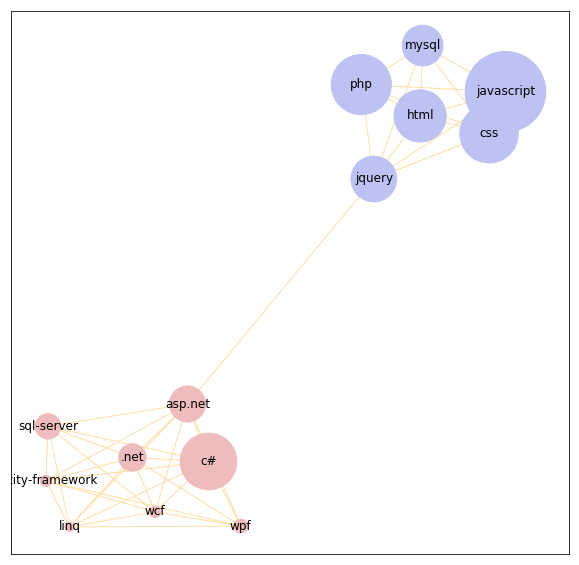

In [39]:
draw_graph(max_clique,size=(10,10))

# Degree Distribution 

For checking the degree distribution of the graph plotting the list containing degrees for each node works. In the tag network clearly most tags hae only 1 or 2 neighbors while some tags are linked to more than 10-12 tags.

Text(0.5,1,'Stack Overflow Tag Degree Distribution')

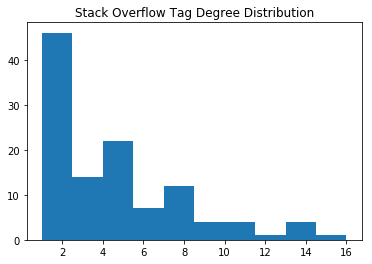

In [38]:
plt.hist([node[1] for node in list(G.degree())])
plt.title("Stack Overflow Tag Degree Distribution")